# On this notebook i will explore and excrat the labels of each image from its name

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [2]:
#pd.set_option('display.max_rows', None)

## Establishing the path of the folder containing the images and making a list of them

In [3]:
filepath = '../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace'

#quick note, i had to correct the file '61_1_20170109150557335.jpg.chip.jpg','39_1_20170116174525125.jpg.chip.jpg' and '61_1_20170109142408075.jpg.chip.jpg' to this form since it was missing race label

In [4]:
file_list = os.listdir(filepath)

## Converting it into a data frame and modyfing some of its features

In [5]:
test_df = pd.DataFrame(file_list, columns=['file_name'])
test_df.head()

,file_name
0,42_0_0_20170117130005462.jpg.chip.jpg
1,36_0_3_20170119201817029.jpg.chip.jpg
2,26_0_3_20170119184329894.jpg.chip.jpg
3,52_1_1_20170113000523249.jpg.chip.jpg
4,3_0_0_20170110212548876.jpg.chip.jpg


In [6]:
test_df['file_name'] = test_df['file_name'].astype(str)
test_df.dtypes

file_name    object
dtype: object

### Splitting the file name to extract the age, gender, race and date of the image

In [7]:
test_df['file_name'][0].split('_')

['42', '0', '0', '20170117130005462.jpg.chip.jpg']

In [8]:
#split the age
test_df['age']=test_df['file_name'].apply(lambda x: x.split('_')[0])
#split the gender
test_df['gender']=test_df['file_name'].apply(lambda x: x.split('_')[1])
#split the race
test_df['race']=test_df['file_name'].apply(lambda x: x.split('_')[2])
#split the datetime
test_df['date']=test_df['file_name'].apply(lambda x: x.split('_')[3].split('.')[0])

In [9]:
#debug column to see any row with missing information in the label
#test_df['debug'] = test_df['file_name'].apply(lambda x: len(x.split('_')) != 4)

In [10]:
#test_df.loc[test_df['debug'] == True]

In [11]:
test_df.dtypes

file_name    object
age          object
gender       object
race         object
date         object
dtype: object

In [12]:
#converting columns from object to int
test_df['age']=test_df['age'].astype(int)
test_df['gender']=test_df['gender'].astype(int)
test_df['race']=test_df['race'].astype(int)


In [13]:
test_df.head()

,file_name,age,gender,race,date
0,42_0_0_20170117130005462.jpg.chip.jpg,42,0,0,20170117130005462
1,36_0_3_20170119201817029.jpg.chip.jpg,36,0,3,20170119201817029
2,26_0_3_20170119184329894.jpg.chip.jpg,26,0,3,20170119184329894
3,52_1_1_20170113000523249.jpg.chip.jpg,52,1,1,20170113000523249
4,3_0_0_20170110212548876.jpg.chip.jpg,3,0,0,20170110212548876


In [14]:
test_df.dtypes

file_name    object
age           int64
gender        int64
race          int64
date         object
dtype: object

### Coding a function to convert the date into datetime format

In [15]:
#converting to date format

def todate(x):
    try:
        x = x[0:8]
        x = int(x)
        return pd.to_datetime(x, format='%Y%m%d')
    except:
        return print(f'failed at {x}')
        

In [16]:
test_df['datetime'] = test_df['date'].apply(lambda x: todate(x))

In [18]:
#only run the line bellow once

#test_df.drop(columns=['date'], inplace=True)


### Sorting the dataframe by age and resetting index

In [19]:
#sorting the dataframe by age
test_df.sort_values(by=['age'], inplace=True)

In [23]:
#resetting the index
test_df.reset_index(drop=True, inplace=True)

## Eporting the dataframe as csv

In [27]:
#Exporting the table to csv

test_df.to_csv('../raw_data/image_metadata.csv', index=False)

In [32]:
#corroborating everything is ok
meta_df = pd.read_csv('../raw_data/image_metadata.csv').head()
meta_df.head()

,file_name,age,gender,race,datetime
0,1_1_3_20161219225015272.jpg.chip.jpg,1,1,3,2016-12-19
1,1_0_0_20161219203503252.jpg.chip.jpg,1,0,0,2016-12-19
2,1_0_2_20161219204252348.jpg.chip.jpg,1,0,2,2016-12-19
3,1_1_0_20170109190844250.jpg.chip.jpg,1,1,0,2017-01-09
4,1_0_3_20161220220544050.jpg.chip.jpg,1,0,3,2016-12-20


### Testing the path and file name concatenation and img displaying

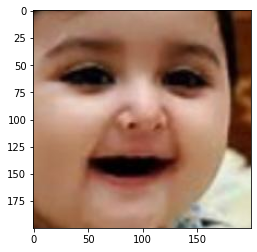

In [33]:
from tensorflow.keras.preprocessing.image import load_img

img=load_img('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+meta_df['file_name'][0])
plt.imshow(img)

In [ ]:
#creating a function to add all image arrays to the table

def convert_array(name):
    img=load_img('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+name)
    img_array = img_to_array(img)
    
    return img_array
    

In [ ]:
test_df['img_array']=None
for name in test_df[:10000].itertuples():
    test_df['img_array'][name[0]]= convert_array(name[1])
    
    

In [ ]:
len(test_df['img_array'][3326])

In [ ]:
#test_df['image_array'] = test_df['file_name'][:].apply(lambda x: convert_array(x))

In [ ]:
#test_df['image_array'] = test_df['file_name'][10000:15000].apply(lambda x: convert_array(x))

In [ ]:
#test_df['image_array'] = test_df['file_name'][15000:].apply(lambda x: convert_array(x))

In [ ]:
test_df.shape

In [ ]:
#convert_array(test_df['file_name'][1])

In [ ]:
test_df.tail(2)

In [ ]:
test_df.sort_values(by=['age'])

In [ ]:
test_df['image_array'].isnull().sum()

In [ ]:
img=load_img('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+'115_1_1_20170112213257263.jpg.chip.jpg')
plt.imshow(img)

In [ ]:
img_to_array(img)


In [ ]:
image.array_to_img(img_ar)

In [ ]:
for i in range(0,5):
    img=image.load_img('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+file_list[i])
    plt.imshow(img)

In [ ]:
image.load_img('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+file_list[0])

In [ ]:
cv2.imread('../raw_data/UTK-face/UTKface_Aligned_cropped/UTKFace/'+file_list[0]).shape

In [ ]:
for face in faces:
    print(face)

In [ ]:
face_df
